In [2]:
pip install stable-baselines3[extra]

     |████████████████████████████████| 174 kB 7.9 MB/s 


In [3]:
!apt install swig cmake
!pip install stable-baselines3[extra] box2d box2d-kengz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2.18.04.2).
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 1s (793 kB/s)
Selecting previously unselected package swig3.0.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../swig3.0_3.0.12-1_amd64.deb ...
Unpacking swig3.0 (3.0.12-1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_3.0.12-1_amd64.deb ...
Unpacking 

In [4]:
import numpy as np
import gym
import random
from scipy.linalg import expm, sinm, cosm
from numpy.linalg import inv
import matplotlib.pyplot as plt

###Gym sample test

In [ ]:
import gym

env = gym.make("Taxi-v3").env

env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [ ]:
env.reset() # reset environment to a new, random state
env.render()

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Action Space Discrete(6)
State Space Discrete(500)


In [ ]:
state = env.encode(3, 1, 2, 0) # (taxi row, taxi column, passenger index, destination index)
print("State:", state)

env.s = state
env.render()

State: 328
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [ ]:
env.P[328]

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

In [ ]:
q_table = np.zeros([env.observation_space.n, env.action_space.n])

"""Training the agent"""

import random
from IPython.display import clear_output

# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_epochs = []
all_penalties = []

for i in range(1, 100001):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        next_state, reward, done, info = env.step(action) 
        
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1
        
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")

Episode: 100000
Training finished.



In [ ]:
"""Evaluate agent's performance after Q-learning"""

total_epochs, total_penalties = 0, 0
episodes = 100

for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    
    done = False
    
    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

Results after 100 episodes:
Average timesteps per episode: 13.21
Average penalties per episode: 0.0


In [ ]:
class BasicEnv(gym.Env):

    def __init__(self):
        # There are two actions, first will get reward of 1, second reward of -1. 
        self.action_space = gym.spaces.Discrete(5)
        # self.action_space = 1
        self.observation_space = gym.spaces.Discrete(2)

    def step(self, action):

        # if we took an action, we were in state 1
        if state == 0:
          
    
           if action == 4:
               reward = 10
               done = True
           elif action == 0:
             reward = -10
             done = True
           else:
               reward = -1
               done = False
           next_state=1
        if state == 1:
          
    
           if action == 4:
               reward = -10
               done = True
           elif action == 0:
             reward = 10
             done = True
           else:
               reward = -1
               done = False
           next_state=0            
        
        # regardless of the action, game is done after a single step

        

        info = {}

        return next_state, reward, done, info

    def reset(self):
        state = 0
        return state

In [ ]:
env = BasicEnv()
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

q_table = np.zeros((state_space_size, action_space_size))

print(q_table)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [ ]:
num_episodes = 1000
max_steps_per_episode = 10 # but it won't go higher than 1

alpha = 0.1
gamma = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01

exploration_decay_rate = 0.01

In [ ]:
rewards_all_episodes = []

# Q-Learning algorithm
for episode in range(num_episodes):
    state = env.reset()
    
    done = False
    rewards_current_episode = 0
    
    for step in range(max_steps_per_episode):
        
        
        # Exploration -exploitation trade-off
        exploration_rate_threshold = random.uniform(0,1)
        if exploration_rate_threshold > exploration_rate: 
            action = np.argmax(q_table[state,:])
        else:
            action = env.action_space.sample()
            
        new_state, reward, done, info = env.step(action)
        
        # Update Q-table for Q(s,a)
        q_table[state, action] = (1 - alpha) * q_table[state, action] + \
            alpha * (reward + gamma * np.max(q_table[new_state,:]))
            
        state = new_state
        rewards_current_episode += reward
   
        if done == True: 
            break
            
    # Exploration rate decay
    exploration_rate = min_exploration_rate + \
        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)
    
    rewards_all_episodes.append(rewards_current_episode)
    
# Calculate and print the average reward per 10 episodes
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes), num_episodes / 100)
count = 100
print("********** Average  reward per thousand episodes **********\n")

for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r / 100)))
    count += 100
    
# Print updated Q-table
print("\n\n********** Q-table **********\n")
print(q_table)

********** Average  reward per thousand episodes **********

100 :  3.1500000000000012
200 :  8.439999999999987
300 :  9.569999999999983
400 :  9.989999999999982
500 :  9.99999999999998
600 :  9.789999999999981
700 :  9.99999999999998
800 :  9.99999999999998
900 :  9.99999999999998
1000 :  9.99999999999998


********** Q-table **********

[[ 93.23166015  89.64467792  89.88769488 100.33187365 136.30691268]
 [127.58274008  59.11073288  49.74761265  68.35393329  43.58737414]]


### Temp Test 1

Time step = 1
$$T1_{k+1}dt=(\frac{T2-T1_{k}}{R_{1,2}}+W1Q1+W2Q2)C1+T1_k
$$
$$T2_{k+1}dt=(\frac{T3-T2_{k}}{R_{2,3}}+\frac{T1-T2_{k}}{R_{1,2}})C2+T2_k
$$

states: T1. With dim(R(T1))=50, T1 in range(0,50) c degree?

constant:T2,R,W1,W2,C1?

action: Q1,Q2? space?? For test implementation, Q within[-4,5]. Constraint: Q must within a range?

Terminate: T1 arrives target value or T1 out of acceptable range. In this test we use 21 degree as target and [10,45] as aceptable range.

Reward: If arrives target value +10, out of reasonable region -10, other -1. To minimam Q, less reward with less time with less Q?



In [ ]:
class BuildingEnv(gym.Env):

    def __init__(self):
        # There are two actions, first will get reward of 1, second reward of -1. 
        self.action_space = gym.spaces.Discrete(10)
        # self.action_space = 1
        self.observation_space = gym.spaces.Discrete(50)
        self.T2=30
        self.R=5
        self.W1=1
        self.W2=1
        self.C1=1

    def step(self, action):

        # if we took an action, we were in state 1
         
        
        # regardless of the action, game is done after a single step
        Q1=(action-4) #Q will be in range [-4,5]
        Q2=(action-4)
        next_state= int( ((self.T2-state)/self.R+self.W1*Q1+self.W2*Q2)*self.C1+state  )
        if next_state== 21: #target T 21 degree
          reward=10
          done = True
        elif next_state>45 or next_state<10:
          reward=-10
          done = True

        else:
          done=False
          reward=-1



        

        info = {}

        return next_state, reward, done, info

    def reset(self):
        state = 0
        return state

In [ ]:
env = BuildingEnv()
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

q_table = np.zeros((state_space_size, action_space_size))

print(q_table)

num_episodes = 1000
max_steps_per_episode = 10 # but it won't go higher than 1

alpha = 0.1
gamma = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01

exploration_decay_rate = 0.01

In [ ]:
rewards_all_episodes = []

# Q-Learning algorithm
for episode in range(num_episodes):
    state = env.reset()
    
    done = False
    rewards_current_episode = 0
    
    for step in range(max_steps_per_episode):
        
        
        # Exploration -exploitation trade-off
        exploration_rate_threshold = random.uniform(0,1)
        if exploration_rate_threshold > exploration_rate: 
            action = np.argmax(q_table[state,:])
        else:
            action = env.action_space.sample()
            
        new_state, reward, done, info = env.step(action)
        
        # Update Q-table for Q(s,a)
        q_table[state, action] = (1 - alpha) * q_table[state, action] + \
            alpha * (reward + gamma * np.max(q_table[new_state,:]))
            
        state = new_state
        rewards_current_episode += reward
   
        if done == True: 
            break
            
    # Exploration rate decay
    exploration_rate = min_exploration_rate + \
        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)
    
    rewards_all_episodes.append(rewards_current_episode)
    
# Calculate and print the average reward per 10 episodes
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes), num_episodes / 100)
count = 100
print("********** Average  reward per thousand episodes **********\n")

for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r / 100)))
    count += 100
    
# Print updated Q-table
print("\n\n********** Q-table **********\n")
print(q_table)

********** Average  reward per thousand episodes **********

100 :  -4.659999999999998
200 :  5.469999999999996
300 :  7.249999999999993
400 :  8.339999999999991
500 :  8.61999999999999
600 :  8.579999999999993
700 :  8.61999999999999
800 :  8.999999999999991
900 :  8.979999999999992
1000 :  8.999999999999991


********** Q-table **********

[[-8.14697981e+00 -2.70496695e+00 -6.86189404e+00 -6.12579511e+00
  -5.69532790e+00 -6.86189404e+00 -4.23190905e-01  8.90000000e+00
   3.94740160e-01 -4.13216377e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00

In [ ]:
q_table[20]

array([ 1.69014739,  0.        , -0.0912781 ,  0.        ,  0.        ,
        0.        , -0.1       ,  0.        , -0.3439    ,  0.        ])

In [ ]:
total_epochs, total_penalties,total_achieved= 0, 0, 0
episodes = 100

for _ in range(episodes):
    state = env.reset()
    epochs, penalties,achieved, reward = 0, 0, 0,0
    
    done = False
    
    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)
        if reward ==10:
            achieved += 1

        if reward == -10:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs
    total_achieved+=achieved

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")
print(f"Average achived per episode: {total_achieved / episodes}")

Results after 100 episodes:
Average timesteps per episode: 2.0
Average penalties per episode: 0.0
Average achived per episode: 1.0


### Discretization

$$ \frac{d}{dt} \begin{pmatrix}
T_1 \\
T_2 \\
\end{pmatrix} = \begin{pmatrix}
\frac{-1}{C_1R_{1,2}} & \frac{1}{C_1R_{1,2}}\\
\frac{1}{C_2R_{1,2}} & \frac{-1}{C_2R_{2,3}}-\frac{1}{C_2R_{1,2}}\\
\end{pmatrix}
\begin{pmatrix}
T_1 \\
T_2 \\
\end{pmatrix}+
\begin{pmatrix}
0 & \frac{W_1}{C_1} &\frac{W_2}{C_1}\\
\frac{1}{C_2R_{2,3}} &0 &0\\
\end{pmatrix} \begin{pmatrix}
T_3 \\
Q_1 \\
Q_2 \\
\end{pmatrix}$$
$$
T_1 =\begin{pmatrix}
1 & 0 \\
\end{pmatrix}\begin{pmatrix}
T_1 \\
T_2 \\
\end{pmatrix} 
$$
Let $$
A = \begin{pmatrix}
\frac{-1}{C_1R_{1,2}} & \frac{1}{C_1R_{1,2}}\\
\frac{1}{C_2R_{1,2}} & \frac{-1}{C_2R_{2,3}}-\frac{1}{C_2R_{1,2}}\\
\end{pmatrix}
$$
$$
B =\begin{pmatrix}
0 & \frac{W_1}{C_1} &\frac{W_2}{C_1}\\
\frac{1}{C_2R_{2,3}} &0 &0\\
\end{pmatrix}
$$
$$
C=\begin{pmatrix}
1 & 0 \\
\end{pmatrix} ,
D= 0
$$
$x(t)=\begin{pmatrix}
T_1 \\
T_2 \\
\end{pmatrix},\dot{x}(t)=\frac{d}{dt} \begin{pmatrix}
T_1 \\
T_2 \\
\end{pmatrix},u(t)=\begin{pmatrix}
T_3 \\
Q_1 \\
Q_2\\
\end{pmatrix},y(t)=T_1$
\begin{aligned}
&\text{Equation 1}    \qquad &\mathbf{\dot{x}}(t) &= \mathbf{A} \mathbf{x}(t) +\mathbf{B} \mathbf{u}(t)\\
&\text{Equation 2}  \qquad &\mathbf{y}(t)       &= \mathbf{C} \mathbf{x}(t) + \mathbf{D} \mathbf{u}(t)
\end{aligned}

Discretize:
$$x[k+1] = A_dx[k]+B_du[k]$$
$$y[k] = C[k]+D[k]$$
$$T=\text{sample time} ,A_d = e^{AT}$$
$$B_d = A^{-1}(A_d-I)B \text{  if A is non-singular}$$


Question: Time step = 1
$$\frac{d}{dt} 
T_1=(\frac{T2-T1_{k}}{R_{1,2}}+W1Q1+W2Q2)C1$$
$$\frac{d}{dt}T_1(t) =\frac{T_1[k+1]-T_1[k]}{dt},dt=timestep
$$
$$T1_{k+1}=(\frac{T2-T1_{k}}{R_{1,2}}+W1Q1+W2Q2)C1+T1_k
$$



states: T1, T2. With dim(R(T))=30, T1 in range(0,29) c degree?

constant:T3(for now),R,W,C

action: Q1,Q2. For test implementation, Q within[-4,5]. Constraint: Q must within a range?

Terminate: T1 arrives target value or T1 out of acceptable range. In this test we use 26,25 degree as target and [0,29] as aceptable range.

Reward: If arrives target value +10, out of reasonable region -10, other -1. To minimam Q, less reward with less time with less Q?

In [ ]:

timestep=1
C_1=1
C_2=2
R1_2=12
R2_3=23
w_1=0.1
w_2=0.2
T1_ini=0
T2_ini=0
T3_ini=30
Q_1ini=-20
Q_2ini=-40
X=np.array([T1_ini,T2_ini]).T
Y=np.array([T3_ini,Q_1ini,Q_2ini]).T
A=np.array([[-1/(C_1*R1_2),1/(C_1*R1_2)],[1/(C_2*R1_2),-1/(C_2*R2_3)-1/(C_2*R1_2)]])
B=np.array([[0,w_1/C_1,w_2/C_1],[1/(C_2*R2_3),0,0]])
A_d = expm(A*1)
B_d = inv(A)@(A_d-np.eye(A_d.shape[0]))@B
X_new = A_d@X + B_d@Y
print(X_new)


[-9.57424715  0.43380989]


In [ ]:
X_new = A_d@X_new + B_d@Y
print(X_new)


[-33.95182377  -0.43640979]


In [ ]:
class BuildingEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self):
        # There are two actions, first will get reward of 1, second reward of -1. 
        self.action_space = gym.spaces.Discrete(10)
        # self.action_space = 1
        self.min_T1=0
        self.min_T2=0
        self.max_T1=29
        self.max_T2=29
        self.observation_space = gym.spaces.Discrete(900)
        # self.low = np.array([self.min_T1, self.min_T2], dtype=np.float32)
        # self.high = np.array([self.max_T1, self.max_T2], dtype=np.float32)
        # self.observation_space = gym.spaces.Box(self.low, self.high, dtype=np.float32)
        #self.observation_space = gym.spaces.Box(low=0, high=3, shape=(2,1), dtype=env.observation_space.dtype)
        self.C_1=1
        self.C_2=2
        self.R1_2=12
        self.R2_3=23
        self.w_1=0.1
        self.w_2=0.2
        self.T1_ini=0
        self.T2_ini=0
        self.T3_ini=30
        self.Q_1ini=20
        self.Q_2ini=40
        self.Q_dic={}
        self.A_lis=[[0,0],[0,1],[1,0],[10,1],[100,1],[1,100],[1,10],[1,1000],[1000,10],[2000,3000]]
        i=0
        for j in range(30):
          for k in range(30):
            self.Q_dic[i]=[j,k]
            i+=1




    def step(self, action):

        # if we took an action, we were in state 1
         
        
        # regardless of the action, game is done after a single step
        # Q1=(action-4) #Q will be in range [-4,5]
        # Q2=(action-4)
        # next_state= int( ((self.T2-state)/self.R+self.W1*Q1+self.W2*Q2)*self.C1+state  )
        # if next_state== 21: #target T 21 degree
        #   reward=10
        #   done = True
        # elif next_state>45 or next_state<10:
        #   reward=-10
        #   done = True

        # else:
        #   done=False
        #   reward=-1

        T1 = self.Q_dic[state][0]
        
        T2 = self.Q_dic[state][1]
        Q_1ini=self.A_lis[action][0]*10
        Q_2ini=self.A_lis[action][1]*10

        X=np.array([T1,T2]).T
        Y=np.array([self.T3_ini,Q_1ini,Q_2ini]).T
        A=np.array([[-1/(self.C_1*self.R1_2),1/(self.C_1*self.R1_2)],[1/(self.C_2*self.R1_2),-1/(self.C_2*self.R2_3)-1/(self.C_2*self.R1_2)]])
        B=np.array([[0,self.w_1/self.C_1,self.w_2/self.C_1],[1/(self.C_2*self.R2_3),0,0]])
        A_d = expm(A*1e-3)
        B_d = inv(A)@(A_d-np.eye(A_d.shape[0]))@B
        X_new = A_d@X + B_d@Y
        
       
        if X_new[0]>29 or X_new[0]<0 or X_new[1]>29 or X_new[1]<0:
          
          reward = -100
          done = True
          info = {}
          return state, reward, done, info
        list_of_value = list(self.Q_dic.values())
        next_state = list_of_value.index(list(X_new.astype(int)))
        
        if X_new.astype(int)[0]== 26: #target T1 26
          reward=100
          done = True
        # elif next_state>45 or next_state<10:
        #   reward=-10
        #   done = True

        else:
          done=False
          reward=-1



        

        info = {}

        return next_state, reward, done, info

    def reset(self):
        state = 0
        return state
    def render(self, mode='human'):
        pass

    def close(self):
        pass

In [ ]:
env = BuildingEnv()
obs=env.reset() # reset environment to a new, random state

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))
print("The initial observation is {}".format(obs))
random_action = env.action_space.sample()

# # Take the action and get the new observation space
new_obs, reward, done, info = env.step(random_action)
print("The new observation is {}".format(new_obs))
env.Q_dic[env.state][0]

Action Space Discrete(10)
State Space Discrete(900)
The initial observation is 0
The new observation is 210


0

In [ ]:
env = BuildingEnv()
action_space_size = env.action_space.n
state_space_size = 900

q_table = np.zeros((state_space_size, action_space_size))


num_episodes = 1000
max_steps_per_episode = 10 # but it won't go higher than 1

alpha = 0.1
gamma = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01

exploration_decay_rate = 0.01

In [ ]:
rewards_all_episodes = []

# Q-Learning algorithm
for episode in range(num_episodes):
    state = env.reset()
    
    done = False
    rewards_current_episode = 0
    
    for step in range(max_steps_per_episode):
        
        
        # Exploration -exploitation trade-off
        exploration_rate_threshold = random.uniform(0,1)
        if exploration_rate_threshold > exploration_rate: 
            action = np.argmax(q_table[state,:])
        else:
            action = env.action_space.sample()
            
        new_state, reward, done, info = env.step(action)
        
        
        # Update Q-table for Q(s,a)
        q_table[state, action] = (1 - alpha) * q_table[state, action] + \
            alpha * (reward + gamma * np.max(q_table[new_state,:]))
            
        state = new_state
        rewards_current_episode += reward
   
        if done == True: 
            break
            
    # Exploration rate decay
    exploration_rate = min_exploration_rate + \
        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)
    
    rewards_all_episodes.append(rewards_current_episode)
    
# Calculate and print the average reward per 10 episodes
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes), num_episodes / 100)
count = 100
print("********** Average  reward per thousand episodes **********\n")

for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r / 100)))
    count += 100
    
# Print updated Q-table
print("\n\n********** Q-table **********\n")
print(q_table.shape)

********** Average  reward per thousand episodes **********

100 :  -9.99999999999998
200 :  -9.959999999999981
300 :  65.25000000000007
400 :  91.68000000000015
500 :  94.90000000000015
600 :  94.96000000000016
700 :  94.94000000000015
800 :  94.91000000000017
900 :  94.95000000000014
1000 :  94.95000000000016


********** Q-table **********

(900, 10)


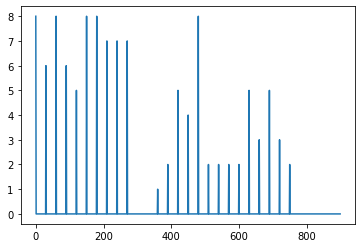

In [ ]:

plt.plot(np.argmax(q_table,1))
plt.show()

Results after 1000 episodes:
Average timesteps per episode: 6.0
Average penalties per episode: 0.0
Average achived per episode: 1.0


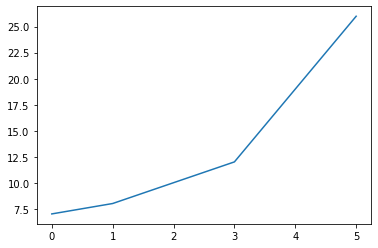

In [ ]:
total_epochs, total_penalties,total_achieved= 0, 0, 0
episodes = 1000
All_path=[]
for _ in range(episodes):
    state = env.reset()
    epochs, penalties,achieved, reward = 0, 0, 0,0
    
    done = False
    T1_lis=[]
    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)
        T1_lis.append(env.Q_dic[state][0])
        if reward ==100:
            achieved += 1

        if reward <= -50:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs
    total_achieved+=achieved
    All_path.append(T1_lis)

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")
print(f"Average achived per episode: {total_achieved / episodes}")
plt.plot(All_path[0])
plt.show()

###Stable Baseline 

In [ ]:
from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import PPO2 
#stable_baselines 3

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/usr/local/lib/python3.7/dist-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [ ]:
env = BuildingEnv()
# Optional: PPO2 requires a vectorized environment to run
# the env is now wrapped automatically when passing it to the constructor
# env = DummyVecEnv([lambda: env])

model = PPO2(MlpPolicy, env, verbose=1)
model.learn(total_timesteps=10000)

obs = env.reset()
for i in range(1000):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [ ]:
class BasicEnv2(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self):
        # There are two actions, first will get reward of 1, second reward of -1. 
        self.action_space = gym.spaces.Discrete(5)
        self.observation_space = gym.spaces.Discrete(2)

    def step(self, action):

        # if we took an action, we were in state 1
        state = 1
    
        reward = np.random.normal(loc = action, scale = action)
            
        # regardless of the action, game is done after a single step
        done = True

        info = {}

        return state, reward, done, info

    def reset(self):
        state = 0
        return state
  
    def render(self, mode='human'):
        pass

    def close(self):
        pass
env = BuildingEnv()

# Optional: PPO2 requires a vectorized environment to run
# the env is now wrapped automatically when passing it to the constructor
# env = DummyVecEnv([lambda: env])

model = PPO2(MlpPolicy, env, verbose=False)
model.learn(total_timesteps=10000)

obs = env.reset()
for i in range(10):
    action, _states = model.predict(obs)
    print(action)
    obs, rewards, dones, info = env.step(action)
    env.render()

1
1
1
1
1
1
1
1
1
1


In [ ]:
!apt install swig cmake
!pip install stable-baselines3[extra] box2d box2d-kengz

In [ ]:
import gym
import numpy as np

from stable_baselines3 import DDPG
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise
from stable_baselines3.common.evaluation import evaluate_policy
env = gym.make("Pendulum-v0")

# The noise objects for DDPG
n_actions = env.action_space.shape[-1]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

model = DDPG("MlpPolicy", env, action_noise=action_noise, verbose=1)
model.learn(total_timesteps=10000, log_interval=10)
model.save("ddpg_pendulum")
env = model.get_env()

del model # remove to demonstrate saving and loading

model = DDPG.load("ddpg_pendulum")
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10, deterministic=True)
# state = env.reset()
# while True:
#     action, _states = model.predict(obs)
#     state, rewards, dones, info = env.step(action)

    # env.render(mode='rgb_array')

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.54e+03 |
| time/              |           |
|    episodes        | 10        |
|    fps             | 56        |
|    time_elapsed    | 35        |
|    total_timesteps | 2000      |
| train/             |           |
|    actor_loss      | 64.4      |
|    critic_loss     | 0.127     |
|    learning_rate   | 0.001     |
|    n_updates       | 1800      |
----------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.25e+03 |
| time/              |           |
|    episodes        | 20        |
|    fps             | 52        |
|    time_elapsed    | 76        |
|    total_timesteps | 4000      |
| train/             |           |
|    actor_loss      | 96.3    

In [ ]:
print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

mean_reward=-187.19 +/- 81.77374163587604


In [ ]:
env = gym.make("Pendulum-v0")

# The noise objects for DDPG
n_actions = env.action_space.shape[-1]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

model = DDPG("MlpPolicy", env, action_noise=action_noise, verbose=1)
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10, deterministic=True)
print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


mean_reward=-1131.07 +/- 255.85145010683692


### Continuous State and Action

In [4]:
class BuildingEnv2(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self,timestep,error_rate):
        # There are two actions, first will get reward of 1, second reward of -1. 
        self.timestep = timestep
        self.Qlow = np.array([-1.0, -1.0], dtype=np.float32)
        self.Qhigh = np.array([1.0, 1.0], dtype=np.float32)
        self.action_space = gym.spaces.Box(self.Qlow, self.Qhigh, dtype=np.float32)
        self.min_T1=0
        self.min_T2=0
        self.max_T1=29
        self.max_T2=29

        self.low = np.array([self.min_T1, self.min_T2], dtype=np.float32)
        self.high = np.array([self.max_T1, self.max_T2], dtype=np.float32)
        self.observation_space = gym.spaces.Box(self.low, self.high, dtype=np.float32)
        #self.observation_space = gym.spaces.Box(low=0, high=3, shape=(2,1), dtype=env.observation_space.dtype)
        self.C_1=1
        self.C_2=2
        self.R1_2=12
        self.R2_3=23
        self.w_1=0.1
        self.w_2=0.2
        self.T1_ini=26.0
        self.T2_ini=27.0
        self.T3_ini=30

        self.epochkeeper=0
        self.target = 17.0
        self.error_rate = error_rate

        # self.renum = 0





    def step(self, action):
        if self.epochkeeper >= 5000:
          reward = -100
          done = True
          info = {}
          return self.state,reward,done,info


        T1 = self.state[0]
        
        T2 = self.state[1]

        Q_1 = action[0]*10
        Q_2 = action[1]*10
        
        # Q_1ini=self.A_lis[action][0]*10
        # Q_2ini=self.A_lis[action][1]*10

        X=np.array([T1,T2]).T
        Y=np.array([self.T3_ini,Q_1,Q_2]).T
        A=np.array([[-1/(self.C_1*self.R1_2),1/(self.C_1*self.R1_2)],[1/(self.C_2*self.R1_2),-1/(self.C_2*self.R2_3)-1/(self.C_2*self.R1_2)]])
        B=np.array([[0,self.w_1/self.C_1,self.w_2/self.C_1],[1/(self.C_2*self.R2_3),0,0]])
        A_d = expm(A*self.timestep)
        B_d = inv(A)@(A_d-np.eye(A_d.shape[0]))@B
        X_new = A_d@X + B_d@Y
        
        T1_new = X_new[0]
        T2_new = X_new[1]
        
        # if T1_new>self.max_T1:
        #   T1_new = self.max_T1
        # if T1_new< self.min_T1:
        #   T1_new = self.min_T1

        # if T2_new>self.max_T2:
        #   T2_new = self.max_T2
        # if T2_new< self.min_T2:
        #   T2_new = self.min_T2
        reward = 0
        done = False
        self.epochkeeper +=1 
        if T1_new>29 or T1_new<0 or T2_new>29 or T2_new<0:
          
          reward = -100
          done = True
          info = {}
         
          return self.state,reward,done,info
        error = T1_new - self.target
        if np.abs(error) <=0.1 :
         
          reward = 100
          done = True
        # reward -= ((action[0]**2+action[1]**2)*0.0001+np.abs(error))*self.error_rate
        reward -= np.abs(error)*self.error_rate
        info = {}
        self.state=np.array([T1_new, T2_new], dtype=np.float32)
        # print('T1:',T1_new)
        # print('done',done)
        # print('reward:',reward)
         


        return self.state, reward, done, info

    def reset(self):
        # print('Reset',self.renum)
        # self.renum +=1
        self.epochkeeper = 0
        self.state = np.random.uniform(0,29,2)
        # self.state = np.array([self.T1_ini, self.T2_ini])
        # self.state = np.array([26.0, 27.0])
        return self.state
    def render(self, mode='human'):
        pass

    def close(self):
        pass

In [ ]:
env = BuildingEnv2(0.1)
obs=env.reset() # reset environment to a new, random state

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))
print("The initial observation is {}".format(obs))
random_action = env.action_space.sample()
print('randomactoin:',random_action)
# # Take the action and get the new observation space
new_obs, reward, done, info = env.step(random_action)
print("The new observation is {}".format(new_obs))

Action Space Box(-1.0, 1.0, (2,), float32)
State Space Box(0.0, 29.0, (2,), float32)
The initial observation is [26. 27.]
randomactoin: [ 0.04294042 -0.89495206]
T1: 25.834337028681315
The new observation is [25.834337 27.002003]


In [14]:
import gym
import numpy as np

from stable_baselines3 import DDPG
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise
from stable_baselines3.common.evaluation import evaluate_policy
env = BuildingEnv2(0.1,1)

# The noise objects for DDPG
n_actions = env.action_space.shape[-1]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma= 0.1* np.ones(n_actions))

model = DDPG("MlpPolicy", env, action_noise=action_noise, verbose=1)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [17]:
total_epochs, total_penalties,total_achieved= 0, 0, 0
episodes = 10
All_path=[]
for _ in range(episodes):

    epochs, penalties,achieved, reward = 0, 0, 0,0
    
    done = False
    T1_lis=[]
    state = env.reset()
    while not done:
        action, _states = model.predict(state)
        state, reward, done, info = env.step(action)
        T1_lis.append(state[0])
        if np.abs(state[0]-17)<=0.1:
            achieved += 1

        if reward <= -50:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs
    total_achieved+=achieved
    All_path.append(T1_lis)

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")
print(f"Average achived per episode: {total_achieved / episodes}")

Results after 10 episodes:
Average timesteps per episode: 209.9
Average penalties per episode: 0.6
Average achived per episode: 0.4


Learn with reward = -error*1

In [ ]:
for i in range(200):
  model.learn(total_timesteps=1000, log_interval=10)
  print('loopnum',i)


model.save("nmsl")
env = model.get_env()

del model # remove to demonstrate saving and loading

# model = DDPG.load("nmsl")
# mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10, deterministic=True)

# print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

串流輸出內容已截斷至最後 5000 行。
| train/             |          |
|    actor_loss      | 390      |
|    critic_loss     | 1.47e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 38964    |
---------------------------------
loopnum 36
loopnum 37
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 95.7     |
|    ep_rew_mean     | -592     |
| time/              |          |
|    episodes        | 10       |
|    fps             | 57       |
|    time_elapsed    | 16       |
|    total_timesteps | 957      |
| train/             |          |
|    actor_loss      | 399      |
|    critic_loss     | 1.17e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 41142    |
---------------------------------
loopnum 38
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 95.9     |
|    ep_rew_mean     | -561     |
| time/              |          |
|    episodes        | 10       |
|    fps             | 63   

In [ ]:
np.random.uniform(0,29,2)

array([ 0.89248025, 22.30835741])

Results after 1000 episodes:
Average timesteps per episode: 36.062
Average penalties per episode: 0.564
Average achived per episode: 0.436


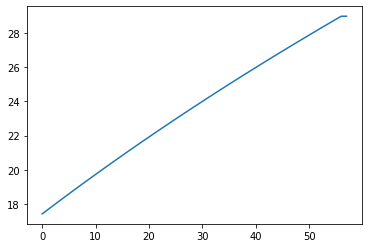

In [ ]:
model = DDPG.load("nmsl")
env = BuildingEnv2(0.1)
total_epochs, total_penalties,total_achieved= 0, 0, 0
episodes = 1000
All_path=[]
for _ in range(episodes):

    epochs, penalties,achieved, reward = 0, 0, 0,0
    
    done = False
    T1_lis=[]
    state = env.reset()
    while not done:
        action, _states = model.predict(state)
        state, reward, done, info = env.step(action)
        T1_lis.append(state[0])
        if np.abs(state[0]-17)<=0.1:
            achieved += 1

        if reward <= -50:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs
    total_achieved+=achieved
    All_path.append(T1_lis)

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")
print(f"Average achived per episode: {total_achieved / episodes}")
plt.plot(All_path[0])
plt.show()

Learn with reward = -error*0.1

In [18]:
import gym
import numpy as np

from stable_baselines3 import DDPG
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise
from stable_baselines3.common.evaluation import evaluate_policy
env = BuildingEnv2(0.1,0.1)

# The noise objects for DDPG
n_actions = env.action_space.shape[-1]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma= 0.1* np.ones(n_actions))

model = DDPG("MlpPolicy", env, action_noise=action_noise, verbose=1)

for i in range(200):
  model.learn(total_timesteps=1000, log_interval=10)
  print('loopnum',i)


model.save("errorrate0.1")


串流輸出內容已截斷至最後 5000 行。
|    ep_rew_mean     | -49.3    |
| time/              |          |
|    episodes        | 20       |
|    fps             | 36       |
|    time_elapsed    | 24       |
|    total_timesteps | 889      |
| train/             |          |
|    actor_loss      | 21.6     |
|    critic_loss     | 15.2     |
|    learning_rate   | 0.001    |
|    n_updates       | 74497    |
---------------------------------
loopnum 42
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 49       |
|    ep_rew_mean     | 7.77     |
| time/              |          |
|    episodes        | 10       |
|    fps             | 39       |
|    time_elapsed    | 12       |
|    total_timesteps | 490      |
| train/             |          |
|    actor_loss      | 25.2     |
|    critic_loss     | 30.7     |
|    learning_rate   | 0.001    |
|    n_updates       | 75133    |
---------------------------------
---------------------------------
| rollout/      

Results after 1000 episodes:
Average timesteps per episode: 36.218
Average penalties per episode: 0.572
Average achived per episode: 0.428


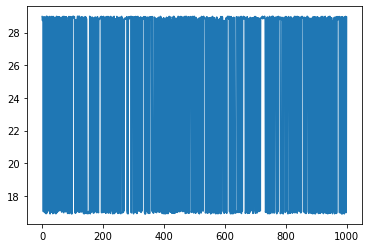

In [19]:
model = DDPG.load("errorrate0.1")
env = BuildingEnv2(0.1,0.1)
total_epochs, total_penalties,total_achieved= 0, 0, 0
episodes = 1000
All_path=[]
for _ in range(episodes):

    epochs, penalties,achieved, reward = 0, 0, 0,0
    
    done = False
    # T1_lis=[]
    state = env.reset()
    while not done:
        action, _states = model.predict(state)
        state, reward, done, info = env.step(action)
        # T1_lis.append(state[0])
        if np.abs(state[0]-17)<=0.1:
            achieved += 1
            

        if reward <= -50:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs
    total_achieved+=achieved
    All_path.append(state[0])
    

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")
print(f"Average achived per episode: {total_achieved / episodes}")
plt.plot(All_path)
plt.show()

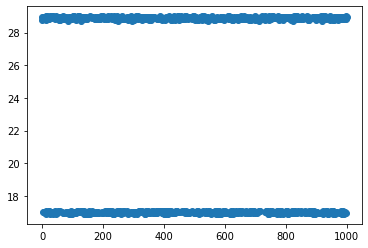

In [21]:
x=np.arange(len(All_path))
plt.scatter(x,All_path)

Without action effect and do 1000 loop

In [5]:
import gym
import numpy as np

from stable_baselines3 import DDPG
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise
from stable_baselines3.common.evaluation import evaluate_policy
env = BuildingEnv2(0.1,0.1)

# The noise objects for DDPG
n_actions = env.action_space.shape[-1]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma= 0.1* np.ones(n_actions))

model = DDPG("MlpPolicy", env, action_noise=action_noise, verbose=1)

for i in range(1000):
  model.learn(total_timesteps=1000, log_interval=10)
  print('loopnum',i)


model.save("new0.1")

串流輸出內容已截斷至最後 5000 行。
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 37.3     |
|    ep_rew_mean     | -15.3    |
| time/              |          |
|    episodes        | 20       |
|    fps             | 35       |
|    time_elapsed    | 21       |
|    total_timesteps | 746      |
| train/             |          |
|    actor_loss      | 31.3     |
|    critic_loss     | 89.4     |
|    learning_rate   | 0.001    |
|    n_updates       | 871624   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 35.6     |
|    ep_rew_mean     | -16.8    |
| time/              |          |
|    episodes        | 30       |
|    fps             | 36       |
|    time_elapsed    | 29       |
|    total_timesteps | 1069     |
| train/             |          |
|    actor_loss      | 31.5     |
|    critic_loss     | 87.9     |
|    learning_rate   | 0.001    |
|    n_updates       | 8718

Results after 1000 episodes:
Average timesteps per episode: 35.303
Average penalties per episode: 0.593
Average achived per episode: 0.407


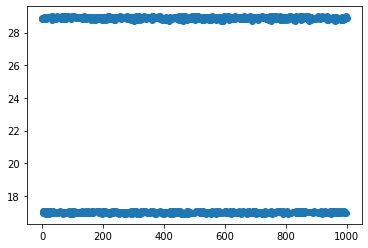

In [6]:
model = DDPG.load("new0.1")
env = BuildingEnv2(0.1,0.1)
total_epochs, total_penalties,total_achieved= 0, 0, 0
episodes = 1000
All_path=[]
for _ in range(episodes):

    epochs, penalties,achieved, reward = 0, 0, 0,0
    
    done = False
    # T1_lis=[]
    state = env.reset()
    while not done:
        action, _states = model.predict(state)
        state, reward, done, info = env.step(action)
        # T1_lis.append(state[0])
        if np.abs(state[0]-17)<=0.1:
            achieved += 1
            

        if reward <= -50:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs
    total_achieved+=achieved
    All_path.append(state[0])
    

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")
print(f"Average achived per episode: {total_achieved / episodes}")
x=np.arange(len(All_path))
plt.scatter(x,All_path)

###Fundamental Version

In [142]:
class BuildingEnvF(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self,timestep,Parameter,error):
        # There are two actions, first will get reward of 1, second reward of -1. 
        self.timestep = timestep
        self.Qlow = np.array([-1.0, -1.0], dtype=np.float32)
        self.Qhigh = np.array([1.0, 1.0], dtype=np.float32)
        self.action_space = gym.spaces.Box(self.Qlow, self.Qhigh, dtype=np.float32)
        self.min_T1=0
        self.min_T2=0
        self.max_T1=29
        self.max_T2=29
        self.low = np.array([self.min_T1, self.min_T2], dtype=np.float32)
        self.high = np.array([self.max_T1, self.max_T2], dtype=np.float32)
        self.observation_space = gym.spaces.Box(self.low, self.high, dtype=np.float32)

        self.C_1=Parameter['C_1']
        self.C_2=Parameter['C_2']
        self.R1_2=Parameter['R1_2']
        self.R2_3=Parameter['R2_3']
        self.w_1=Parameter['w_1']
        self.w_2=Parameter['w_2']
        self.T1_ini=Parameter['T1_ini']
        self.T2_ini=Parameter['T2_ini']
        self.T3_ini=Parameter['T3_ini']
        self.error = error
        

        self.epochkeeper=0
        self.target = Parameter['target']






    def step(self, action):




        T1 = self.state[0]
        
        T2 = self.state[1]
        # print('Action',action)

        Q_1 = action[0]*100
        Q_2 = action[1]*100
        

        X=np.array([T1,T2]).T
        Y=np.array([self.T3_ini,Q_1,Q_2]).T
        A=np.array([[-1/(self.C_1*self.R1_2),1/(self.C_1*self.R1_2)],[1/(self.C_2*self.R1_2),-1/(self.C_2*self.R2_3)-1/(self.C_2*self.R1_2)]])
        B=np.array([[0,self.w_1/self.C_1,self.w_2/self.C_1],[1/(self.C_2*self.R2_3),0,0]])
        A_d = expm(A*self.timestep)
        B_d = inv(A)@(A_d-np.eye(A_d.shape[0]))@B
        X_new = A_d@X + B_d@Y
        
        T1_new = X_new[0]
        T2_new = X_new[1]
        
        reward = 0
        done = False
        self.epochkeeper +=1 
        if T1_new>self.max_T1:
          T1_new = self.max_T1
          done = True
    
        if T1_new< self.min_T1:
          T1_new = self.min_T1
          done = True


        # if T2_new>self.max_T2:
        #   T2_new = self.max_T2
        # if T2_new< self.min_T2:
        #   T2_new = self.min_T2

        # if T1_new>29 or T1_new<0 or T2_new>29 or T2_new<0:
          
        #   reward = -100
        #   done = True
        #   info = {}
         
        #   return self.state,reward,done,info
        error = T1_new - self.target
  
        # print('rwd:',self.testrwd)
        if np.abs(error) <=self.error :
         
          reward = 100
          done = True
        # reward -= (action[0]**2+action[1]**2)*0.1
        reward -= (error)**2*0.01 
        info = {}
        self.state=np.array([T1_new, T2_new], dtype=np.float32)
        if self.epochkeeper >= 5000:
          done = True        
        # print('Action1:',Q_1)
        # print('Action2:',Q_2)
        # print('T1:',T1_new)
        # print('done',self.epochkeeper)
        # print('reward:',reward)
         


        return self.state, reward, done, info

    def reset(self):
        self.epochkeeper = 0
        # print('reset')

        self.state = np.random.uniform(0,29,2)
        # self.state = np.array([self.T1_ini, self.T2_ini])
        # self.state = np.array([26.0, 27.0])
        return self.state
    def render(self, mode='human'):
        pass

    def close(self):
        pass
import gym
import numpy as np

from stable_baselines3 import DDPG
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3 import TD3
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise

def Train(env,epochs,name):
# The noise objects for DDPG
  n_actions = env.action_space.shape[-1]
  action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma= 0.1* np.ones(n_actions))
  model =  TD3("MlpPolicy", env, action_noise=action_noise, verbose=0)
  # model = DDPG("MlpPolicy", env, action_noise=action_noise, verbose=1)
  for i in range(100):
    model.learn(total_timesteps=epochs, log_interval=10)
    print('loop:',i)
  model.save(name)
  # env = model.get_env()
  model = DDPG.load(name)
  mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10, deterministic=True)

  print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

In [143]:
Parameter={"C_1":1,"C_2":2,"R1_2":12,"R2_3":23,"w_1":0.1,"w_2":0.2,"T1_ini":18.0,"T2_ini":27.0,"T3_ini":30,"target":27.0}
envF = BuildingEnvF(0.1,Parameter,1)
Train(envF,1000,'Temp')

loop: 0
loop: 1
loop: 2
loop: 3
loop: 4
loop: 5
loop: 6
loop: 7
loop: 8
loop: 9
loop: 10
loop: 11
loop: 12
loop: 13
loop: 14
loop: 15
loop: 16
loop: 17
loop: 18
loop: 19
loop: 20
loop: 21
loop: 22
loop: 23
loop: 24
loop: 25
loop: 26
loop: 27
loop: 28
loop: 29
loop: 30
loop: 31
loop: 32
loop: 33
loop: 34
loop: 35
loop: 36
loop: 37
loop: 38
loop: 39
loop: 40
loop: 41
loop: 42
loop: 43
loop: 44
loop: 45
loop: 46
loop: 47
loop: 48
loop: 49
loop: 50
loop: 51
loop: 52
loop: 53
loop: 54
loop: 55
loop: 56
loop: 57
loop: 58
loop: 59
loop: 60
loop: 61
loop: 62
loop: 63
loop: 64
loop: 65
loop: 66
loop: 67
loop: 68
loop: 69
loop: 70
loop: 71
loop: 72
loop: 73
loop: 74
loop: 75
loop: 76
loop: 77
loop: 78
loop: 79
loop: 80
loop: 81
loop: 82
loop: 83
loop: 84
loop: 85
loop: 86
loop: 87
loop: 88
loop: 89
loop: 90
loop: 91
loop: 92
loop: 93
loop: 94
loop: 95
loop: 96
loop: 97
loop: 98
loop: 99
mean_reward=27.82 +/- 47.29357603747501


/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1.]
Actions: [1. 1

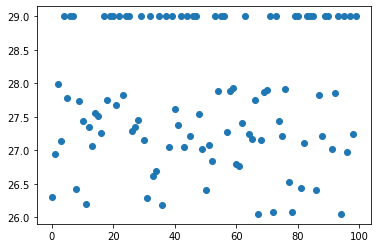

In [144]:
model = DDPG.load('Temp')
env =BuildingEnvF(0.1,Parameter,1)
total_epochs, total_penalties,total_achieved= 0, 0, 0
episodes = 100
All_path=[]
for _ in range(episodes):
    state = env.reset()
    epochs, penalties,achieved, reward = 0, 0, 0,0
    
    done = False
    T1_lis=[]

    while not done:
        action, _states = model.predict(state)
        print('Actions:',action)
        state, reward, done, info = env.step(action)
        # T1_lis.append(state[0])
        if reward >=90:
            achieved += 1

        if reward <= -50:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs
    total_achieved += achieved
    All_path.append(state[0])

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")
print(f"Average achived per episode: {total_achieved / episodes}")
x=np.arange(len(All_path))
plt.scatter(x,All_path)